### Object Classification

#### Import Modules

In [38]:
# IMPORT MODULES
# Import Numpy, TensorFlow, Scipy, Keras
import pickle
import os
import pickle
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import find_peaks_cwt
import random
from sklearn.utils import shuffle
import csv
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from tensorflow.examples.tutorials.mnist import input_data
import keras
from keras.datasets import cifar10
from keras.models import Sequential,model_from_json
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPooling2D
from keras.layers import Flatten,Lambda,ELU
from keras.optimizers import SGD,Adam,RMSprop
from keras.layers.convolutional import Conv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
from IPython.display import SVG
import json
from keras.models import Sequential, model_from_json

# Print
print("Import Modules")

Import Modules


#### Load Data

In [2]:
# LOAD DATA
# Load Training and Test Data
(XTrain,YTrain),(XTest,YTest)=cifar10.load_data()
print('Training Data Shape:',XTrain.shape)
print('Test Data Shape:',XTest.shape)
print('Training Samples:',XTrain.shape[0])
print('Test Samples',XTest.shape[0])

# Load Label Names
LabelNames=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

Training Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)
Training Samples: 50000
Test Samples 10000


#### Explore Data

Example of Image 29236:
Min Value: 23 Max Value: 238
Label ID: [7] Name: Horse


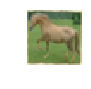

In [3]:
# EXPLORE DATA
# Plot Random Image
Index=Index=random.randint(0,len(XTrain))
SampleImage=XTrain[Index]
SampleLabel=YTrain[Index]
print('Example of Image {}:'.format(Index))
print('Min Value: {} Max Value: {}'.format(SampleImage.min(),SampleImage.max()))
print('Label ID: {} Name: {}'.format(SampleLabel,LabelNames[int(SampleLabel)]))
plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(SampleImage)

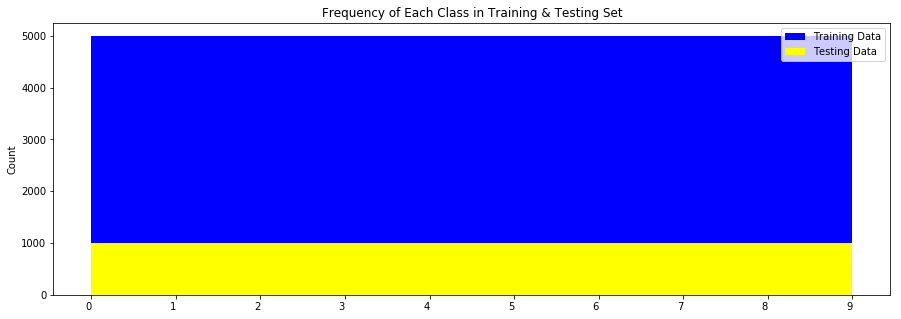

In [4]:
# EXPLORE DATA
# Plot the Histograms for Training and Testing Data
plt.figure(figsize=(15,5))
plt.hist(YTrain,bins=10,label='Training Data',color='blue')
plt.hist(YTest,bins=10,label='Testing Data',color='yellow')
plt.title('Frequency of Each Class in Training & Testing Set')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.xticks(np.arange(0.0,10,1.0),[0,1,2,3,4,5,6,7,8,9],ha='right',rotation=0)
plt.show()

#### Preprocess Data

In [5]:
# PREPROCESS DATA
# Preprocess Training and Test Data
XTrain=XTrain.astype('float32')
XTest=XTest.astype('float32')
XTrain/=255
XTest/=255
YTrain=np_utils.to_categorical(YTrain,10)
YTest=np_utils.to_categorical(YTest,10)

#### Model Architecture

In [22]:
# DEFINE ARCHITECTURE
# Set Epochs and Batch Size
Epochs=30
BatchSize=128

In [19]:
# DEFINE ARCHITECTURE
# Define VGG
def VGG():
    # Initialize Model
    Model=Sequential()
    
    # Layer 1
    Model.add(Conv2D(64,(3,3),padding='same',input_shape=XTrain.shape[1:],name='block1_conv1'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Layer 2
    Model.add(Conv2D(64,(3,3),padding='same',name='block1_conv2'))
    Model.add(BatchNormalization())
    Model.add(Activation('relu'))
    Model.add(MaxPooling2D((2,2),strides=(2,2),name='block1_pool'))
    
    # Layer 3
    Model.add(Conv2D(128,(3,3),padding='same',name='block2_conv1'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))

    # Layer 4
    Model.add(Conv2D(128,(3,3),padding='same',name='block2_conv2'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    Model.add(MaxPooling2D((2,2), strides=(2,2),name='block2_pool'))
    
    # Layer 5
    Model.add(Conv2D(256,(3,3),padding='same',name='block3_conv1'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Layer 6
    Model.add(Conv2D(256,(3,3),padding='same',name='block3_conv2'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Layer 7
    Model.add(Conv2D(256,(3,3),padding='same',name='block3_conv3'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Layer 8
    Model.add(Conv2D(256,(3,3),padding='same',name='block3_conv4'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    Model.add(MaxPooling2D((2,2),strides=(2,2),name='block3_pool'))
    
    # Layer 9
    Model.add(Conv2D(512,(3,3),padding='same',name='block4_conv1'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Layer 10
    Model.add(Conv2D(512,(3,3),padding='same',name='block4_conv2'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Layer 11
    Model.add(Conv2D(512,(3,3),padding='same',name='block4_conv3'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Layer 12
    Model.add(Conv2D(512,(3,3),padding='same',name='block4_conv4'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    Model.add(MaxPooling2D((2,2),strides=(2,2),name='block4_pool'))
    
    # Layer 13
    Model.add(Conv2D(512,(3,3),padding='same',name='block5_conv1'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Layer 14
    Model.add(Conv2D(512,(3,3),padding='same',name='block5_conv2'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Layer 15
    Model.add(Conv2D(512,(3,3),padding='same',name='block5_conv3'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Layer 16
    Model.add(Conv2D(512,(3,3),padding='same',name='block5_conv4'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    
    # Flatten
    Model.add(Flatten())
    
    # Layer 17 (Fully Connected)
    Model.add(Dense(4096))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    Model.add(Dropout(0.5))
    
    # Layer 18 (Fully Connected)
    Model.add(Dense(4096, name='fc2'))
    Model.add(BatchNormalization()) 
    Model.add(Activation('relu'))
    Model.add(Dropout(0.5))
    
    # Layer 19 (Fully Connected)
    Model.add(Dense(10))
    Model.add(BatchNormalization()) 
    Model.add(Activation('softmax'))
    
    return Model

In [21]:
Model=VGG()
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_58 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_58 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_59 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_59 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
__________

#### Configure GPU Settings

In [10]:
# CONFIGURE
# Import Module
Config=tf.ConfigProto(allow_soft_placement=True)
Config.gpu_options.allocator_type='BFC'
Config.gpu_options.per_process_gpu_memory_fraction=0.20

#### Train and Evaluate

In [23]:
# TRAINING MODEL
# Compile Model using Adam Optimizer and Loss Computed by Categorical Cross-Entropy
Model.compile(optimizer=Adam(0.001),loss='categorical_crossentropy',metrics=["accuracy"])

# Train the Model
Model.fit(XTrain,YTrain,batch_size=BatchSize,epochs=Epochs,verbose=1)

# Evaluate the Model
Accuracy=Model.evaluate(x=XTest,y=YTest,batch_size=BatchSize)
print("Accuracy: ",Accuracy[1])

Epoch 1/30
50000/50000 [==============================] - 39s 782us/step - loss: 1.6835 - acc: 0.3645
Epoch 2/30
50000/50000 [==============================] - 33s 654us/step - loss: 1.1320 - acc: 0.6188
Epoch 3/30
50000/50000 [==============================] - 33s 657us/step - loss: 0.8833 - acc: 0.7098
Epoch 4/30
50000/50000 [==============================] - 32s 648us/step - loss: 0.7350 - acc: 0.7641
Epoch 5/30
50000/50000 [==============================] - 32s 643us/step - loss: 0.6340 - acc: 0.8017
Epoch 6/30
50000/50000 [==============================] - 33s 656us/step - loss: 0.5575 - acc: 0.8272
Epoch 7/30
50000/50000 [==============================] - 33s 655us/step - loss: 0.4764 - acc: 0.8536
Epoch 8/30
50000/50000 [==============================] - 33s 655us/step - loss: 0.4305 - acc: 0.8681
Epoch 9/30
50000/50000 [==============================] - 33s 654us/step - loss: 0.3793 - acc: 0.8851
Epoch 10/30
50000/50000 [==============================] - 33s 656us/step - loss: 

#### Augment Data

In [24]:
# AUGMENT DATA
# Load Image Data Generator
Datagen=ImageDataGenerator(
        featurewise_center=False,  # Set Input Mean to 0 over the Dataset
        samplewise_center=False,  # Set each Sample Mean to 0
        featurewise_std_normalization=False,  # Divide Inputs by Standard Deviation of the Dataset
        samplewise_std_normalization=False,  # Divide each Input by its Standard Deviation
        zca_whitening=False,  # Apply ZCA Whitening
        rotation_range=10,  # Randomly Rotate Images in the Range (Degrees, 0 to 180)
        zoom_range = 0.1, # Randomly Zoom Image 
        width_shift_range=0.1,  # Randomly Shift Images Horizontally (Fraction of Total Width)
        height_shift_range=0.1,  # Randomly Shift Images Vertically (Fraction of Total Height)
        horizontal_flip=False,  # Randomly Flip Images
        vertical_flip=False)  # Randomly Flip Images

In [25]:
# AUGMENT DATA
# Fit the Augmentation Model to Training Data
Datagen.fit(XTrain)

In [33]:
# AUGMENT DATA
# Create New Training Data
AugTrainX,AugTrainY=Datagen.flow(XTrain,YTrain,batch_size=50000).next()

In [34]:
# AUGMENT DATA
# Augment Training Data for Images and Labels
X=np.concatenate((XTrain,AugTrainX), axis=0)
Y=np.concatenate((YTrain,AugTrainY),axis=0)
print('Training Data Shape:',X.shape)
print('Test Data Shape:',XTest.shape)
print('Training Samples:',X.shape[0])
print('Test Samples',XTest.shape[0])

Training Data Shape: (100000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)
Training Samples: 100000
Test Samples 10000


#### Train and Evaluate

In [ ]:
# Train the Model
Model.fit(X,Y,batch_size=BatchSize,epochs=Epochs,verbose=1)

In [36]:
# Evaluate the Model
Accuracy=Model.evaluate(x=XTest,y=YTest,batch_size=BatchSize)
print("Accuracy: ",Accuracy[1])

10000/10000 [==============================] - 2s 162us/step
Accuracy:  0.8822


#### Save Model

In [39]:
# TRAINING MODEL
# Save the Model as JSON File, Save Weights in H5 File
JSONString=Model.to_json()
with open('Model.json','w') as JSONFile:
    json.dump(JSONString,JSONFile)
    Model.save_weights('./Model.h5')

print("Model Trained and Saved!")

Model Trained and Saved!
